c:\Users\paulo\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample Size: 50000, ROC AUC Score: 0.8432


c:\Users\paulo\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample Size: 100000, ROC AUC Score: 0.8509


c:\Users\paulo\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample Size: 200000, ROC AUC Score: 0.8530


c:\Users\paulo\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample Size: 500000, ROC AUC Score: 0.8534
   Sample Size  ROC AUC Score
0        50000       0.843242
1       100000       0.850874
2       200000       0.853021
3       500000       0.853432


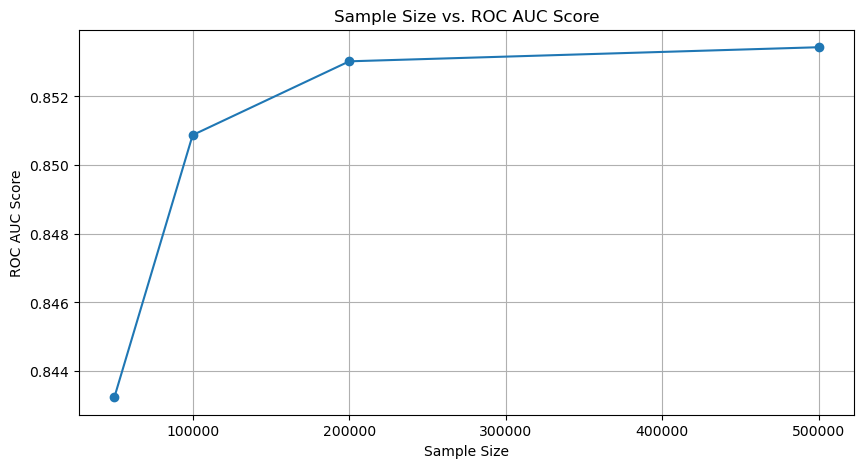

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load Data
df = pd.read_csv('transformed__train_dataframe.csv')

# Function to Evaluate Sample Sizes
def evaluate_sample_sizes(df, target, sample_sizes, random_state=42):
    results = []
    for size in sample_sizes:
        # Stratified Sampling
        sample_df, _ = train_test_split(df, stratify=df[target], test_size=1 - (size / len(df)), random_state=random_state)
        
        # Split into Features and Target
        X = sample_df.drop(target, axis=1)
        y = sample_df[target]
        
        # Train-Test Split
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state)
        
        # Train a Simple Model (e.g., Logistic Regression)
        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        # Evaluate Model Performance
        y_pred = model.predict_proba(X_val)[:, 1]
        auc_score = roc_auc_score(y_val, y_pred)
        
        results.append((size, auc_score))
        print(f"Sample Size: {size}, ROC AUC Score: {auc_score:.4f}")
    
    return results

# Define Sample Sizes to Test
sample_sizes = [50000, 100000, 200000, 500000]

# Evaluate and Find Ideal Sample Size
results = evaluate_sample_sizes(df, 'Response', sample_sizes)

# Convert Results to DataFrame for Easy Analysis
results_df = pd.DataFrame(results, columns=['Sample Size', 'ROC AUC Score'])
print(results_df)

# Plot Results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(results_df['Sample Size'], results_df['ROC AUC Score'], marker='o')
plt.xlabel('Sample Size')
plt.ylabel('ROC AUC Score')
plt.title('Sample Size vs. ROC AUC Score')
plt.grid(True)
plt.show()